### Installing GPN


In [12]:
#pip install git+https://github.com/songlab-cal/gpn.git

  Cloning https://github.com/songlab-cal/gpn.git to /tmp/53895761/pip-req-build-o54oho0m
  Running command git clone --filter=blob:none --quiet https://github.com/songlab-cal/gpn.git /tmp/53895761/pip-req-build-o54oho0m
  Resolved https://github.com/songlab-cal/gpn.git to commit dafc3ca163e4b105a891aad8044d01840fab32e8
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.2
    Uninstalling numpy-2.2.2:
      Successfully uninstalled numpy-2.2.2
Note: you may need to restart the kernel to use updated packages.


In [ ]:
### quick start gouid 

In [17]:
import gpn.model
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch
from transformers import AutoModel, AutoModelForMaskedLM, AutoTokenizer

In [18]:
model_path = "songlab/gpn-brassicales"

In [21]:
#### exsample sequence
seq = "CGGGTTAAAAATCTAGTTGTTATTATTAAAGGAAATAAAATATCCTCATAAAACAATTTGTTGTAATCTATCTTTGGGCTAATGTTCTTATCCTACAAGACGAACCCTGACCGTATTCGTCGTAGAAAAAAAATTGCTTCGATCCCATCATTGAGTTCAATAATCGGCGCACAAAGGCCGATTCATAAAAACTCTAGGCCCATTAAAGTAAAGCCCATTCTCAACCCTATCCAGTCTCCCTGTATATATATATTTACGACACCAACCCAGCGTTGATATTTAATTTTCTTCAGTCAGAGATTTCGAAACCCTAGTCGATTTCGAGATCCAACTAACTCTGCTCCTTATCTCAGGTAAAATTCTCGCTCGAGAACTCAATTGCTTATCCAAAGTTCCAACTGAAGATGCTTTCCTACTGAATCTTAGGTTAATGTTTTGGATTTGGAATCTTACCCGAAATTTCTCTGCAGCTTGTTGAATTTGCGAAGTATGGGAGACGCTAGAGACAACGAAGCCTACGAGGAGGAGCTCTTGGACTATGAAGAAGAAGACGAGAAGGTCCCAGATTCTGGAAACAAAGTTAACGGCGAAGCTGTGAAAAAGTGAGTTTTATGGTTTCCTCGATATGTTTCATGTATACTACTGTGTGTTTAAATTTGTCGATTCTTAGATTACTACTTGATAACAAGTAGCAGTATGT"
len(seq)

700

### Tokenization

In [19]:
tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.get_vocab()

{'[MASK]': 1, '[UNK]': 2, 't': 6, 'c': 4, '[PAD]': 0, 'g': 5, 'a': 3}

In [22]:
input_ids = tokenizer(seq, return_tensors="pt", return_attention_mask=False, return_token_type_ids=False)["input_ids"]
print(input_ids.shape)
input_ids[0, :10]

torch.Size([1, 700])


tensor([4, 5, 5, 5, 6, 6, 3, 3, 3, 3])

### Embedding 


In [23]:
model = AutoModel.from_pretrained(model_path)
model.eval();

In [24]:
with torch.no_grad():
    embedding = model(input_ids=input_ids).last_hidden_state
embedding.shape

torch.Size([1, 700, 512])

In [ ]:
# Let's do a quick visualization. We'll standardize the embeddings.

In [25]:
embedding_df = pd.DataFrame(StandardScaler().fit_transform(embedding[0].numpy()))
embedding_df.index.name = "Position"
embedding_df.columns.name = "Embedding dimension"
embedding_df

Embedding dimension,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
Position,,,,,,,,,,,,,,,,,,,,,
0,-0.518087,0.541440,0.131232,1.053506,2.222629,-0.319741,3.644270,1.093817,-1.380533,0.448888,...,-1.018208,-0.878753,-0.646709,-0.062726,-0.801978,-0.035079,2.433414,0.438933,9.229933,-1.419600
1,-0.751137,0.759646,3.220161,-1.068855,2.493007,-0.625321,2.157838,2.325138,-1.241314,-0.314621,...,-0.137703,-2.056974,1.057701,2.712367,-0.671560,-0.513203,0.225547,-0.879120,3.302933,-1.078402
2,-0.710899,-0.167388,-1.117152,-0.147012,0.793041,0.568515,-1.552413,1.677341,-2.283587,-0.763816,...,5.467332,-1.575755,1.160329,-0.117527,-0.490752,0.919966,0.110476,1.463597,1.251708,0.042053
3,-1.011557,0.004417,0.785731,0.880100,-1.314014,0.547282,-0.473241,0.107971,-1.798417,-0.059564,...,1.310843,-2.385742,-0.696324,-0.386537,0.107418,1.299431,0.853752,1.123087,-0.350534,-0.640750
4,-0.082698,-0.310124,-0.716856,3.308859,-1.243263,-1.491933,1.449804,-0.811680,-0.790326,-0.326597,...,-0.745452,-1.395647,-0.916111,-0.836167,0.454243,0.024448,-1.058236,1.308296,3.921496,0.346961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.465112,0.444199,-0.359129,-0.326517,-0.762708,-0.270667,0.442167,0.046694,0.634355,-0.058325,...,0.927364,-0.005681,-0.227225,-0.692033,-0.608916,0.124922,-0.665498,-0.061753,-0.602381,0.614786
696,-0.973834,1.042631,-0.170295,-0.246929,-0.420490,-0.682757,0.149622,0.966532,0.106323,-1.136616,...,-0.626093,-0.790864,-1.010916,3.175093,0.892961,-0.206767,-0.499504,-1.133052,-0.029237,-0.962530
697,-0.493600,0.792000,-0.298588,-0.410180,-1.292572,-0.796225,0.677158,-0.334222,-2.040731,-0.447183,...,-0.239599,0.605497,-0.869040,-0.338021,-0.572182,-0.486568,-0.789857,1.470951,-0.514976,0.262317


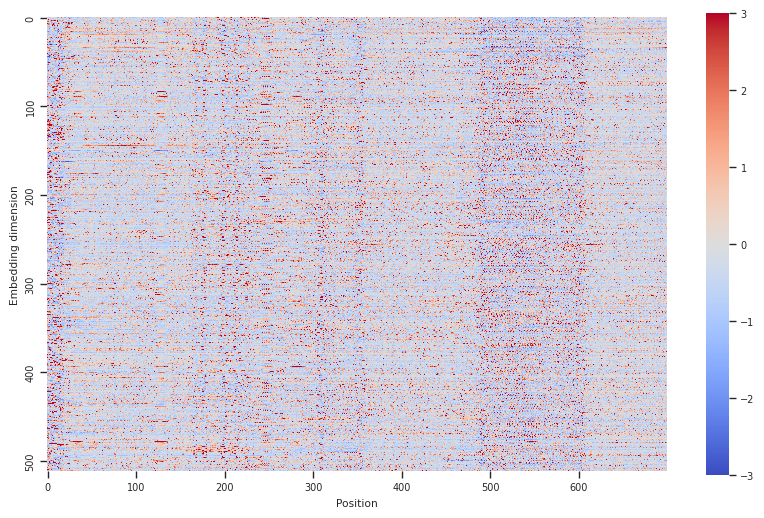

In [26]:
# If you squint you can see the exon locations :)
plt.figure(figsize=(10, 6))
sns.heatmap(embedding_df.T, center=0, vmin=-3, vmax=3, cmap="coolwarm", square=True, xticklabels=100, yticklabels=100);

### Masked language modeling

In [27]:
model_for_mlm = AutoModelForMaskedLM.from_pretrained(model_path)
model_for_mlm.eval();

In [28]:
seq[489:492]  # Start codon

'ATG'

In [29]:
pos = 489  # Let's mask the A and check the model predictions
input_ids[0, pos] = tokenizer.mask_token_id

In [30]:
input_ids
with torch.no_grad():
    all_logits = model_for_mlm(input_ids=input_ids).logits
all_logits.shape

torch.Size([1, 700, 7])

In [31]:
nucleotides = list('acgt')
logits = all_logits[0, pos, [tokenizer.get_vocab()[nc] for nc in nucleotides]]
logits

tensor([ 4.8509, -2.3441, -1.7025, -1.5116])

In [32]:
probs = torch.nn.functional.softmax(logits, dim=0).numpy()
probs

array([9.9611449e-01, 7.4742787e-04, 1.4196937e-03, 1.7183285e-03],
      dtype=float32)

<Axes: xlabel='nucleotide', ylabel='probability'>

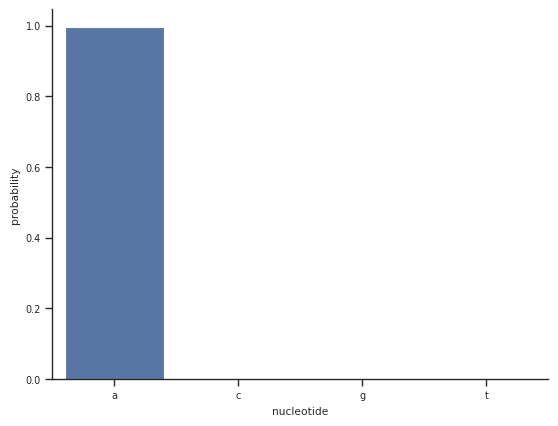

In [33]:

probs_df = pd.DataFrame(dict(nucleotide=nucleotides, probability=probs))
sns.barplot(data=probs_df, x="nucleotide", y="probability")